# Time Series 2
### AR, MA, and ARMA models


### (1) AR (autoregressive) Models

- An AR(1) process is given by: $X_t = \alpha + \beta X_{t-1} + u_t$
     - In lag operator form, $(1- \beta L)X_t = \alpha+u_t$
     
- The process is stationary if $-1 < \beta < 1$.

- We can generalize from an AR(1) to an AR(p) model by simply adding additional autoregressive terms to the model.
$$\text{AR(p): } X_t = \alpha + \beta_1 X_{t-1} + \beta_2 x_{T-2} + ... + \beta_p X_{t-p} + u_t  $$
$$\rightarrow X_t = \alpha +(\beta_1 L + \beta_2 + L^2 + ... + \beta_p L^p)X_t + u_t$$
$$\rightarrow X_t = \alpha +\sum_{i=1}^{p}\beta_i X_{t-i} + u_t$$

### (2) MA (moving average) Models

- A moving average process is similar to an AR process, except that the autoregression is on the error term.

- A MA(1) process is given by: $X_t = \alpha + u_t + \theta u_{t-1}$

- MA(q): $X_t = \alpha + u_t + \theta_1 u_{t-1} + \theta_2 u_{t-2} + ... + \theta_q u_{t-q}$
$$\rightarrow X_t = \alpha + (1+\theta_1 L +\theta_2 L^2 + ... + \theta_q L^q)u_t$$

### (3) Model specification
- ACF(Auto Correlation function)
- PACF(Partial Auto Correlation function)

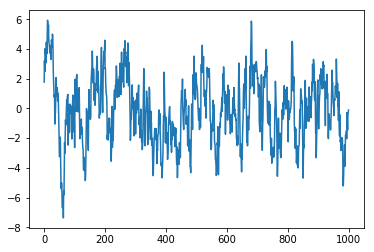

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

ar1 = []
x_0 = 0
for i in range(1000) : 
    np.random.seed(i)
    ar1.append(0.9 * x_0 + np.random.normal())  #AR(!), coefficient = 0.9
    x_0 = ar1[-1]
plt.plot(ar1)

<Figure size 432x288 with 0 Axes>

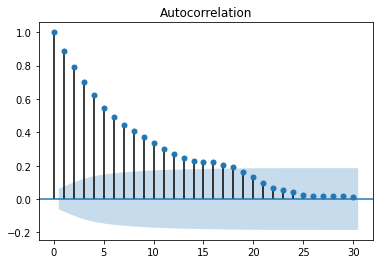

In [18]:
plt.figure()
plot_acf(np.array(ar1)) #AR의 acf : 지수적으로 서서히 감소
plt.show() #왜 이런형태인지는 직접 식으로 도출해보면 됨

<Figure size 432x288 with 0 Axes>

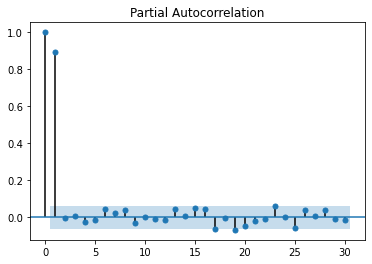

In [19]:
plt.figure()
plot_pacf(np.array(ar1)) #AR의 pacf : 1,2번째 값만 크고 이후로는 뚝 잘려서 0주변에 있는 형태
plt.show()#왜 이런형태인지는 직접 식으로 도출해보면 됨

In [20]:
np.random.seed(1)
np.random.normal()

1.6243453636632417

In [21]:
np.random.normal()

-0.6117564136500754

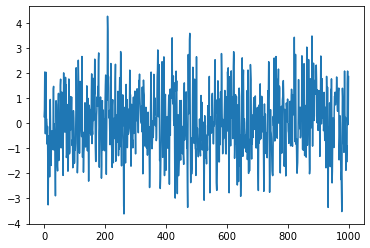

In [22]:
ma1 = []
np.random.seed(42)
errors = np.random.normal(size=1001)
for i in range(1000) : 
    ma1.append(0.8 * errors[i] + errors[i+1]) #MA모형
plt.plot(ma1)

<Figure size 432x288 with 0 Axes>

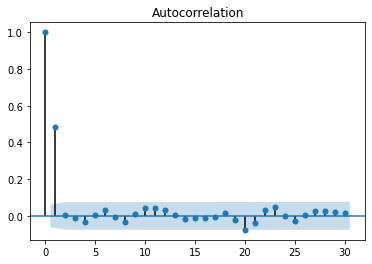

In [23]:
plt.figure()
plot_acf(np.array(ma1)) #MA의 acf : 1,2번째 값만 크고 이후로는 뚝 잘려서 0주변에 있는 형태
plt.show()#왜 이런형태인지는 직접 식으로 도출해보면 됨

<Figure size 432x288 with 0 Axes>

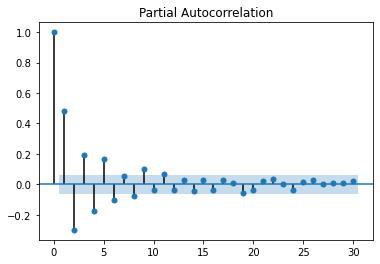

In [24]:
plt.figure()
plot_pacf(np.array(ma1)) #MA의 pacf : 위 아래로 왔다갔다하면서 서서히 지수적으로 감소
plt.show()#왜 이런형태인지는 직접 식으로 도출해보면 됨

- What if the process has the characteristics of both AR and MA models?
    - 그러나 AR, MA 특징을 모두 가진다면 위 그림만으로는 판단이 힘들다
    - 아래의 ARMA 모형을 보자

## 1. ARMA(p,q)

An ARMA model, or Autoregressive Moving Average model, is used to describe weakly stationary stochastic time series in terms of two polynomials. The first of these polynomials is for autoregression, the second for the moving average.

Often this model is referred to as the ARMA(p,q) model, where:

- p is the order of the autoregressive polynomial,
- q is the order of the moving average polynomial.

The model is given by  <br />

$Y_t-\Phi_1Y_{t-1}-\Phi_2Y_{t-2}-...-\Phi_pY_{t-p} = \mu + e_t + \theta_1e_{t-1} + \theta_2e_{t-2} + \theta_qe_{t-q}$  <br />

$\rightarrow$ $\Phi(L) Y_t = \mu + \theta(L) e_t$,  <br />
$\Phi(L) = 1-\Phi_1L-\Phi_2L^2-...-\Phi_pL^p$,  <br />
$\theta(L) = 1+\theta_1L+\theta_2L^2+...+\theta_qL^q$  <br />

Example : $Y_t = 0.75Y_{t-1} -0.25Y_{t-2}+e_t+0.65e_{t-1}+0.35e_{t-2}$ 

In [25]:
#arma process를 만들기위한 instance가 생김
ar = np.array([1, -0.75, 0.25]) 
ma = np.array([1, 0.65, 0.35])
m = sm.tsa.ArmaProcess(ar, ma)
m

ArmaProcess([1.0, -0.75, 0.25], [1.0, 0.65, 0.35], nobs=100) at 0x20bdc7a8408

Generate time series data from ARmaProcess

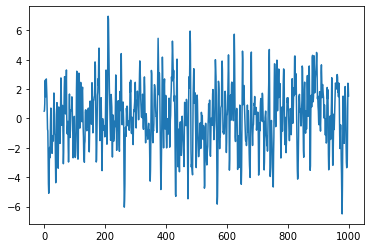

In [26]:
# ARMA process 1000개 생성

np.random.seed(42)
x = m.generate_sample(1000)
plt.plot(x)
plt.show()

Check if the model is stationary

In [27]:
print(m.isstationary)

True


Lag selection based on Information criteria

In [28]:
res = sm.tsa.arma_order_select_ic(x, ic=["aic", "bic"], trend="nc")
#data를 ARMA(p,q)에서 p,q가 어떤 모형인지 알려줌 

In [29]:
res.aic_min_order #만약 1,0으로 나오면 AR(1) model

(2, 2)

In [30]:
res.bic_min_order

(2, 2)

In [31]:
m2 = sm.tsa.ARMA(x, (2, 2))
r = m2.fit(disp=False)
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1396.986
Method:                       css-mle   S.D. of innovations              0.977
Date:                Tue, 31 Aug 2021   AIC                           2805.973
Time:                        09:17:20   BIC                           2835.419
Sample:                             0   HQIC                          2817.165
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0775      0.118      0.656      0.512      -0.154       0.309
ar.L1.y        0.8508      0.072     11.766      0.000       0.709       0.992
ar.L2.y       -0.3264      0.057     -5.738      0.0

### ARCH/GARCH model  (시험 X)

(1) ARCH (Autoregressive Conditional Heteroscedasticity) models
- Volatility Clustering: Financial time series (expecially security prices) often exhibit the phenomenon of volatility clustering.
- This results in correlation in error variance over time
- ARCH models take into account such correlation or time-varying volatility.

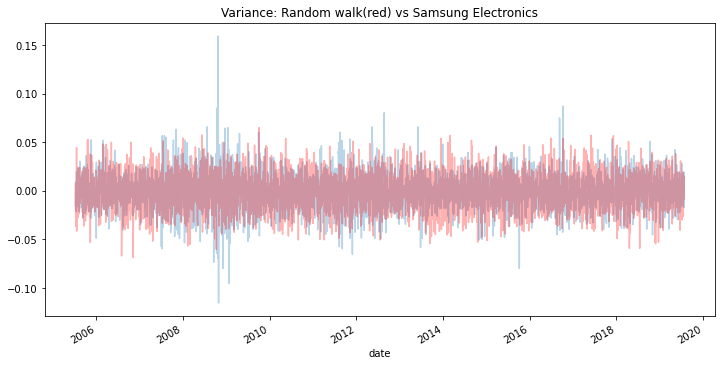

In [33]:
df = pd.read_csv('005930_daily.txt', sep = '\t', index_col=0, parse_dates=True)
ret = df.close.pct_change().dropna()
mock = np.random.normal(loc = np.mean(ret), scale = np.std(ret), size=len(ret))
mock = pd.Series(mock, index=ret.index)
ret.plot(figsize=(12, 6), alpha=0.3)
mock.plot(c='r', alpha=0.3)
plt.title('Variance: Random walk(red) vs Samsung Electronics');

(1-1) 
- ARCH(1)
\begin{align*}
 p_t &= \mu + p_{t-1} + \epsilon_t \\
 r_t &= \mu + \epsilon_t,  \epsilon_t\sim N(0, \sigma^2_t) \\
\sigma_t^2 &= \omega + \alpha \epsilon_{t-1}^2,  \text{where}~~ \omega, \alpha\ge0, 
                 \alpha  <1
\end{align*}

- estimation? 
    - OLS
    - MLE

(1-2) 
- ARCH(p)
$$\sigma_t^2 = \omega + \sum_{i=1}^{L} \alpha_i \epsilon_{t-i}^2$$

(1-3) 
- GARCH(1)
\begin{align*}
 p_t &= \mu + p_{t-1} + \epsilon_t \\
 r_t &= \mu + \epsilon_t,  \epsilon_t\sim N(0, \sigma^2_t) \\
\sigma_t^2 &= \omega + \alpha \epsilon_{t-1}^2  + \beta \sigma_{t-1}^2,  \text{where}~~ \omega, \alpha, \beta \ge0, 
                 \alpha +\beta <1
\end{align*}

- interpretation?
    - $\alpha$: how volatility reacts to new information
    - $\beta$: persistence of the volatility
    - $\alpha + \beta$: the rate at which the new information dies over time

In [36]:
from arch import arch_model
am = arch_model(ret) 
res = am.fit(update_freq=5)
print(res.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9071.908965766252
            Iterations: 5
            Function evaluations: 57
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                9071.91
Distribution:                  Normal   AIC:                          -18135.8
Method:            Maximum Likelihood   BIC:                          -18111.2
                                        No. Observations:                 3473
Date:                Tue, Aug 31 2021   Df Residuals:                     3472
Time:                        09:33:08   Df Model:                            1
                                  Mean Model                                  
 

C:\Users\Park\anaconda3\envs\main\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003437. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
